# Лабораторная работа №2. Pandas

*Версия от 29.09.2024*

**Мягкий дедлайн** ~ 10.10.24

**Жесткий дедлайн** ~ 24.10.24

Вам предстоит поработать с большим датасетом, содержащим логи пользователей на сайте магазина по продаже косметики. Записи собраны с октября 2019 г. по февраль 2020 г.

https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop

Каждая строка в файле представляет лог-событие. Все события связаны с товарами и пользователями.

Описание столбцов:

`event_time` - время события

`event_type` - тип события (**view** - просмотр товара, **cart** - добавление/просмотр корзины, **remove_from_cart** - удаление из корзины, **purchase** - покупка)

`product_id` - уникальный идентификатор товара

`category_id` - уникальный идентификатор категории, к которой принадлежит продукт

`category_code` - название категории

`brand` - компания, которая выпускает товар

`price` - цена продукта

`user_id` - уникальный идентификатор пользователя

`user_session` - уникальный индентификатор сессии пользователя, в течение которое происходят события

Импортируйте необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Задание 1. Подготовка данных
(0.5 баллов)

1) Имеется 5 файлов, в каждом из которых пользовательские сессии за каждый месяц с октября по февраль.

Создайте один большой датасет `events_data` объединив все имеющиеся (`2019-Oct.csv`,`2019-Nov.csv`, `2019-Dec.csv`, `2020-Jan.csv`, `2020-Feb.csv`)

Не забудьте переиндексировать новый датасет.

Если вы используете `Google Colab`, то наиболее удобным способом работы с файлами будет использование гугл диска, в котором будут находиться все ваши файлы.

In [2]:
df_oct=  pd.read_csv('2019-Oct.csv')
df_nov=  pd.read_csv('2019-Nov.csv')
df_dec=  pd.read_csv('2019-Dec.csv')
df_jan=  pd.read_csv('2020-Jan.csv')
df_feb=  pd.read_csv('2020-Feb.csv')

In [3]:
events_data = pd.concat([df_oct, df_nov, df_dec, df_jan, df_feb], axis=0, ignore_index=True)
events_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [4]:
events_data.tail()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
20692835,2020-02-29 23:59:32 UTC,view,5885416,1487580005092295511,NaN,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10
20692836,2020-02-29 23:59:39 UTC,cart,5550686,1487580008145748965,NaN,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f
20692837,2020-02-29 23:59:45 UTC,view,5850628,1602943681873052386,NaN,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d
20692838,2020-02-29 23:59:54 UTC,view,5716351,1487580010872045658,NaN,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d
20692839,2020-02-29 23:59:59 UTC,view,5927709,1487580013950664926,NaN,de.lux,3.17,621669991,daa3c677-5360-4327-847e-d29658716b99


In [5]:
events_data.shape

(20692840, 9)

In [6]:
df_oct.shape

(4102283, 9)

In [7]:
del df_oct,df_nov,df_dec,df_jan,df_feb

2) С помощью метода `info` выведите информацию по типам данных столбцов датасета.

Для отображения количества заполненных полей используейте опцию `pd.options.display.max_info_rows` и установите нужное значение.

In [8]:
pd.options.display.max_info_rows = 9999999999
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 9 columns):
 #   Column         Non-Null Count     Dtype  
---  ------         --------------     -----  
 0   event_time     20692840 non-null  object 
 1   event_type     20692840 non-null  object 
 2   product_id     20692840 non-null  int64  
 3   category_id    20692840 non-null  int64  
 4   category_code  353594 non-null    object 
 5   brand          11935723 non-null  object 
 6   price          20692840 non-null  float64
 7   user_id        20692840 non-null  int64  
 8   user_session   20688242 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ GB


3) Можно заметить, что в данных есть пропуски. Выпишите, какие столбцы, кроме `user_session`, не удастся использовать для анализа.


'category_code' и 'brand' не удастся использовать для анализа, так как количество непустых строк в этих столбцах составляет 1.7% и 57.7% соответсвенно.

In [9]:
#events_data.drop(['category_code', 'brand'], axis = 1, inplace=True)
#events_data.head()


4) Столбец `user_session` имеет очень важное значение, так как по нему можно отследить путь пользователя в логах. Соответственно данные нужно либо восполнить, либо удалить.

Восполнять данные в данном случае не имеет большого смысла, так как определить к какой сессии принадлежит лог - задача нетривиальная, при этом пропущенных значений не так много, чтобы мы потеряли много информации, поэтому лучшим решением будет удалить строки с пропущенными значениями в этом столбце.

In [10]:
events_data = events_data.dropna(subset='user_session').reset_index().drop(columns='index')

In [11]:
events_data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...
20688237,2020-02-29 23:59:32 UTC,view,5885416,1487580005092295511,NaN,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10
20688238,2020-02-29 23:59:39 UTC,cart,5550686,1487580008145748965,NaN,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f
20688239,2020-02-29 23:59:45 UTC,view,5850628,1602943681873052386,NaN,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d
20688240,2020-02-29 23:59:54 UTC,view,5716351,1487580010872045658,NaN,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d


In [12]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20688242 entries, 0 to 20688241
Data columns (total 9 columns):
 #   Column         Non-Null Count     Dtype  
---  ------         --------------     -----  
 0   event_time     20688242 non-null  object 
 1   event_type     20688242 non-null  object 
 2   product_id     20688242 non-null  int64  
 3   category_id    20688242 non-null  int64  
 4   category_code  353545 non-null    object 
 5   brand          11932754 non-null  object 
 6   price          20688242 non-null  float64
 7   user_id        20688242 non-null  int64  
 8   user_session   20688242 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ GB


In [13]:
events_data.shape

(20688242, 9)

In [14]:
assert len(events_data) == 20688242, "Неправильный размер датасета"

5) Для удобства работы со стобцом `event_time` преобразуйте его из типа `object` в тип `datetime`. Для этого можете воспользоваться методом `to_datetime`.

In [15]:
events_data.event_time = pd.to_datetime(events_data.event_time)

In [16]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20688242 entries, 0 to 20688241
Data columns (total 9 columns):
 #   Column         Non-Null Count     Dtype              
---  ------         --------------     -----              
 0   event_time     20688242 non-null  datetime64[ns, UTC]
 1   event_type     20688242 non-null  object             
 2   product_id     20688242 non-null  int64              
 3   category_id    20688242 non-null  int64              
 4   category_code  353545 non-null    object             
 5   brand          11932754 non-null  object             
 6   price          20688242 non-null  float64            
 7   user_id        20688242 non-null  int64              
 8   user_session   20688242 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 1.4+ GB


# Задание 2. Ad-hoc аналитика

0.5 баллов

1) Проведите простейший описательный анализ датасета с помощью встроенной функции pandas. Какие выводы можно сделать?

In [17]:
events_data.describe(include='all')

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
count,20688242,20688242,2.068824e+07,2.068824e+07,353545,11932754,2.068824e+07,2.068824e+07,20688242
unique,NaN,4,NaN,NaN,12,273,NaN,NaN,4535941
top,NaN,view,NaN,NaN,appliances.environment.vacuum,runail,NaN,NaN,74206ba1-c863-4760-bbdc-b11777059e46
freq,NaN,9657790,NaN,NaN,149148,1528636,NaN,NaN,5411
mean,2019-12-16 05:41:18.183052288+00:00,NaN,5.484278e+06,1.554231e+18,NaN,NaN,8.534892e+00,5.215434e+08,NaN
min,2019-10-01 00:00:00+00:00,NaN,3.752000e+03,1.487580e+18,NaN,NaN,-7.937000e+01,4.654960e+05,NaN
25%,2019-11-08 13:33:41.249999872+00:00,NaN,5.724650e+06,1.487580e+18,NaN,NaN,2.060000e+00,4.817834e+08,NaN
50%,2019-12-13 02:22:43+00:00,NaN,5.810720e+06,1.487580e+18,NaN,NaN,4.050000e+00,5.531190e+08,NaN
75%,2020-01-25 12:51:05.750000128+00:00,NaN,5.857864e+06,1.487580e+18,NaN,NaN,7.030000e+00,5.788491e+08,NaN
max,2020-02-29 23:59:59+00:00,NaN,5.932595e+06,2.242903e+18,NaN,NaN,3.277800e+02,6.220902e+08,NaN


Выводы:
* половина данных собрана до 2019-12-13 02:22:43+00:00
* пользователи чаще просто просматривали товары (9657790 строк из 20688242)
* самый популярный среди 273 брендов - это бренд runail, он встречается в таблице 1528636 раз
* минимальная цена отрицательная?? -79.37, а максимальная 327.78


2) Сколько всего различных категорий товаров (`category_id`)?

In [18]:
events_data.category_id.nunique()

525

всего 525 различных категорий товаров

3) Сколько различных брендов? Какой бренд встречается чаще всего?

In [19]:
events_data.brand.nunique()

273

In [20]:
events_data.brand.value_counts().nlargest(1)

brand
runail    1528636
Name: count, dtype: int64

In [21]:
events_data.brand.value_counts().idxmax()

'runail'

бренд runail встречается чаще всего

всего 273 бренда

4) Какой товар чаще всего смотрели? Какова его средняя цена?

In [22]:
events_data.product_id.value_counts().nlargest(1)

product_id
5809910    141561
Name: count, dtype: int64

чаще всего смотрели товар с id 5809910

In [23]:
events_data[events_data.product_id == 5809910].price.mean() # средняя цена товара с id 5809910

np.float64(5.204677206292694)

5) Сколько уникальных пользователей купили данный товар?

Сохраните значение в переменную `count_user_purchase_product`.

In [24]:
count_user_purchase_product = events_data[(events_data.event_type == 'purchase') & (events_data.product_id == 5809910)].user_id.nunique()

In [25]:
assert count_user_purchase_product == 7049, "Неправильное значение"

6) Сколько уникальных сессий, в которых покупали товары бренда `runail`?

In [26]:
events_data[(events_data.event_type == 'purchase') & (events_data.brand == 'runail')].user_session.nunique()

45379

7) Какова средняя цена покупки в этих сессиях, с условием, что поле `category_code` не должно быть пустым?

Сохраните значение в переменную `mean_price_purchase_runail`

In [27]:
events_data[(events_data.event_type == 'purchase') & (events_data.brand == 'runail') & (events_data.category_code.isnull() == False)]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
19141,2019-10-01 07:02:55+00:00,purchase,5395,1487580006350586771,appliances.environment.vacuum,runail,30.95,548735227,27e9a41f-9940-420d-bd53-7e3a918a28c0
34130,2019-10-01 09:12:39+00:00,purchase,5665817,1487580013053083824,stationery.cartrige,runail,2.22,555496458,a45f4402-22e7-7599-c1f2-d249aea3d09e
34131,2019-10-01 09:12:39+00:00,purchase,5665820,1487580013053083824,stationery.cartrige,runail,2.22,555496458,a45f4402-22e7-7599-c1f2-d249aea3d09e
34132,2019-10-01 09:12:39+00:00,purchase,5665823,1487580013053083824,stationery.cartrige,runail,2.22,555496458,a45f4402-22e7-7599-c1f2-d249aea3d09e
80378,2019-10-01 15:11:30+00:00,purchase,5856192,1487580006350586771,appliances.environment.vacuum,runail,24.44,541475200,40030b42-e8a5-4174-8e63-99bddc3283ca
...,...,...,...,...,...,...,...,...,...
20057468,2020-02-25 15:42:05+00:00,purchase,5856191,1487580006350586771,appliances.environment.vacuum,runail,24.44,493283617,57ebb6bd-ac2e-46fc-a082-518126a6be94
20129228,2020-02-26 05:38:37+00:00,purchase,5395,1487580006350586771,appliances.environment.vacuum,runail,30.95,620029655,a22ddde9-967e-4709-abc2-a258c1f48d60
20183813,2020-02-26 12:20:53+00:00,purchase,5856193,2193074740619379535,furniture.living_room.cabinet,runail,82.54,600298697,9e341546-400a-4c93-8753-22617fc47693
20256659,2020-02-26 21:00:24+00:00,purchase,5856192,1487580006350586771,appliances.environment.vacuum,runail,24.44,512659362,4369ff05-809c-4c7c-a7fa-589a46c4b62f


In [28]:
mean_price_purchase_runail = events_data[(events_data.event_type == 'purchase') & (events_data.brand == 'runail') & (events_data.category_code.isnull() == False)].price.mean()
mean_price_purchase_runail

np.float64(29.134932432432436)

In [29]:
assert 29.13 < mean_price_purchase_runail < 29.14, "Неправильное значение"

8) Посчитайте, сколько произошло событий каждого типа (`event_type`).

In [30]:
event_type_counts = events_data.groupby('event_type').event_time.count()
event_type_counts

event_type
cart                5764557
purchase            1287007
remove_from_cart    3978888
view                9657790
Name: event_time, dtype: int64

## Задание 3. Анализ поведения пользователей
(~ 0.3 баллов)

1) Проанализируйте количество покупок у пользователей.

Посчитайте долю покупок в общем числе событий.

Для каждого пользователя посчитайте количество событий типа `purchase`, а затем сгруппируйте пользователей по числу покупок и посчитайте количество пользователей в каждой группе. Нарисуйте простую столбчатую диаграмму, используя код ниже.

In [31]:
# доля покупок в общем числе событий
events_data[events_data.event_type == 'purchase'].event_time.count() / events_data.event_time.count()

np.float64(0.06220958745552184)

приблизательно 6.2 %

In [32]:
# количество событий типа `purchase` для каждого пользователя
events_data[events_data.event_type == 'purchase'].groupby('user_id').event_time.count()


user_id
9794320       4
10079204      2
10280338     86
12055855      4
12936739      2
             ..
622065819     4
622066161     4
622067983    10
622069477     1
622073202     1
Name: event_time, Length: 110518, dtype: int64

In [33]:
user_purchase_count = pd.DataFrame({'purchases': events_data[events_data.event_type == 'purchase'].groupby('user_id').event_time.count()}).reset_index()
user_purchase_count

,user_id,purchases
0,9794320,4
1,10079204,2
2,10280338,86
3,12055855,4
4,12936739,2
...,...,...
110513,622065819,4
110514,622066161,4
110515,622067983,10
110516,622069477,1


In [34]:
user_purchase_count.groupby('purchases').count()

,user_id
purchases,
1,11417
2,11604
3,10918
4,9605
5,7756
...,...
461,1
500,1
506,1


In [35]:
groupped_user_purchase_count = user_purchase_count.groupby('purchases').count().reset_index()
groupped_user_purchase_count.rename(columns = {'user_id':'Users'}, inplace=True)
groupped_user_purchase_count

,purchases,Users
0,1,11417
1,2,11604
2,3,10918
3,4,9605
4,5,7756
...,...,...
260,461,1
261,500,1
262,506,1
263,603,1


Text(0, 0.5, 'Number of users with purchase')

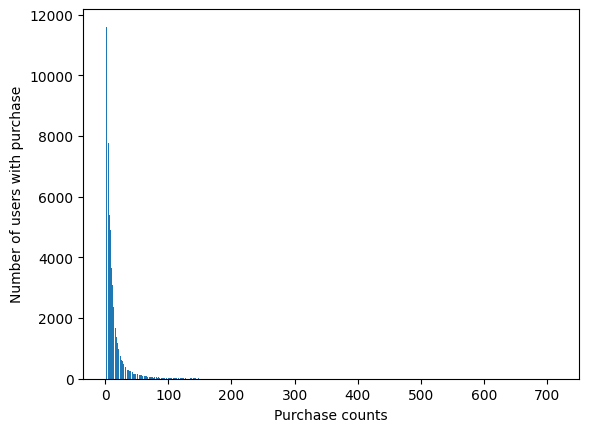

In [36]:
plt.bar(groupped_user_purchase_count['purchases'], groupped_user_purchase_count['Users'])
plt.xlabel('Purchase counts')
plt.ylabel('Number of users with purchase')

Какие выводы о количестве покупок можно сделать?

* большинство пользователей сделали меньше 100 покупок
* около 11 тысяч пользователей сделали единичные покупки

2) Найдите среднее и медианное значение количества уникальных сессий на одного пользователя.

Сохраните значения в переменные `mean_grouped_user_session` и `median_grouped_user_session`

In [37]:
groupped_user_session_count = events_data.groupby('user_id').user_session.unique().reset_index()
groupped_user_session_count.rename(columns = {'user_id':'User'}, inplace=True)
groupped_user_session_count

,User,user_session
0,465496,"[8ad668e6-9567-4da9-b43b-250f12ecab5b, d4b9b57..."
1,1120748,[d0484d94-7ac1-44e8-a310-2360da11ad9d]
2,1180452,[a4818e6d-9069-4aa8-8731-572ac266283f]
3,1458813,"[b16644a2-44db-4650-8156-f6f03782d432, 6873a20..."
4,2038666,[158695f0-13cd-4b5d-94d8-bc2fb8b1ca25]
...,...,...
1639146,622090016,"[1752f371-c277-4a06-818f-f8d2cc95b68d, 3efcf28..."
1639147,622090043,[ab7d349f-db5d-4790-8ab1-31e5c894459d]
1639148,622090052,"[5872302d-7a37-4e86-96f3-f7ea373d2eb5, 062d2f7..."
1639149,622090098,[aba3b9a3-c558-4c91-bb2d-d96a77a4a098]


In [38]:
groupped_user_session_count['session_count'] = groupped_user_session_count.user_session.apply(lambda x: len(x))
groupped_user_session_count

,User,user_session,session_count
0,465496,"[8ad668e6-9567-4da9-b43b-250f12ecab5b, d4b9b57...",2
1,1120748,[d0484d94-7ac1-44e8-a310-2360da11ad9d],1
2,1180452,[a4818e6d-9069-4aa8-8731-572ac266283f],1
3,1458813,"[b16644a2-44db-4650-8156-f6f03782d432, 6873a20...",4
4,2038666,[158695f0-13cd-4b5d-94d8-bc2fb8b1ca25],1
...,...,...,...
1639146,622090016,"[1752f371-c277-4a06-818f-f8d2cc95b68d, 3efcf28...",2
1639147,622090043,[ab7d349f-db5d-4790-8ab1-31e5c894459d],1
1639148,622090052,"[5872302d-7a37-4e86-96f3-f7ea373d2eb5, 062d2f7...",2
1639149,622090098,[aba3b9a3-c558-4c91-bb2d-d96a77a4a098],1


In [39]:
mean_groupped_user_session = groupped_user_session_count.session_count.mean()
median_groupped_user_session = groupped_user_session_count.session_count.median()

In [40]:
assert 2.76 < mean_groupped_user_session < 2.77
assert median_groupped_user_session == 1.0

Попробуйте объяснить в чем причина такого большого расхождения между этими значениями?

Ответ: есть пользователи, которые заходили в несколько сессий, поэтому в среднем у всех выходит завышенное число сессий.

3) Рассмотрите любого пользователя с более чем 100 покупками. Выпишите его историю событий в виде последовательности типов событий. Что можно сказать о процессе покупки?

In [41]:
user_purchase_count[user_purchase_count.purchases > 100]

,user_id,purchases
185,105697630,118
191,107945915,163
300,150318419,370
350,156430889,101
436,172974485,262
...,...,...
108464,618256196,116
108891,619092910,127
108990,619284923,147
109027,619352755,173


рассмотрим пользователя с id 150318419, который совершил 370 покупок

In [42]:
events_data[events_data.user_id == 150318419][['event_time','event_type']].head(60)

,event_time,event_type
50339,2019-10-01 11:05:57+00:00,view
56875,2019-10-01 11:55:10+00:00,view
57014,2019-10-01 11:56:15+00:00,view
69010,2019-10-01 13:34:40+00:00,view
69026,2019-10-01 13:34:49+00:00,cart
81814,2019-10-01 15:25:11+00:00,view
218048,2019-10-02 10:18:04+00:00,view
270376,2019-10-02 15:09:43+00:00,view
379393,2019-10-03 09:27:20+00:00,view
491154,2019-10-04 07:35:53+00:00,view


Пользователь с id 150318419 начинает просматривать товары 1 окт 2019, что-то добавляет в корзину. 2 и 3 окт 2019 что-то просто просматривает. 4 окт 2019 очень долго и тщательно просматривает товары, удаляет товар из корзины, снова долго просматривает, потом наконец добавляет в корзину товары 5 раз, и немного погодя совершает 4 покупки. Видимо, 4 окт 2019 пользователь долждался зарплаты. 5 окт 2019 шоппинг продолжается: просмотр менее тщательный, добавление в корзину товаров 2 раза, еще просмотр и последующая покупка двух товаров. Позже в тот же день длительный просмотр товаров, добавление в корзину 3 раза и незамедлительная покупка 3 товаров.

In [43]:
events_data[(events_data.user_id == 150318419) & (events_data.event_type == 'purchase')][['event_time','event_type']].head(60)

,event_time,event_type
538795,2019-10-04 14:23:56+00:00,purchase
538797,2019-10-04 14:23:56+00:00,purchase
538798,2019-10-04 14:23:56+00:00,purchase
538799,2019-10-04 14:23:56+00:00,purchase
618523,2019-10-05 11:24:07+00:00,purchase
618524,2019-10-05 11:24:07+00:00,purchase
643401,2019-10-05 15:50:58+00:00,purchase
643402,2019-10-05 15:50:58+00:00,purchase
643403,2019-10-05 15:50:58+00:00,purchase
652382,2019-10-05 17:20:08+00:00,purchase


пользователь совершает покупки почти каждый день, начиная с 4 окт!

In [44]:
events_data[(events_data.user_id == 150318419) & (events_data.event_type == 'purchase')][['event_time','event_type']][50:100]

,event_time,event_type
2017297,2019-10-15 12:00:53+00:00,purchase
2017298,2019-10-15 12:00:53+00:00,purchase
2017299,2019-10-15 12:00:53+00:00,purchase
2017300,2019-10-15 12:00:53+00:00,purchase
2017301,2019-10-15 12:00:53+00:00,purchase
2017302,2019-10-15 12:00:53+00:00,purchase
2161661,2019-10-16 13:40:50+00:00,purchase
2161662,2019-10-16 13:40:50+00:00,purchase
2161663,2019-10-16 13:40:50+00:00,purchase
2161664,2019-10-16 13:40:50+00:00,purchase


В конце октября недельный перерыв от покупок (возможно закончились деньги). После первой недели ноября снова покупки.

## Задание 4. Воронка продаж
(~ 0.7 баллов)

Воронка продаж - это визуальное представление пути от первого контакта потенциального покупателя  с каналом продаж до совершения покупки. Это помогает отделу продаж понять, где им нужно отслеживать или изменять процесс продаж из-за падения в воронке продаж.

 В первую очередь необходимо создать новую колонку, которая будет кодировать дату и время события в название месяца. Назовите новый признак - `month`

 Пример: `2019-10-01 00:00:00+0000` --> `October`

Подсказка: воспользуйтесь методами объектов типа `pd.Timestamp`

In [45]:
events_data['month'] = events_data.event_time.apply(lambda x: pd.Timestamp(x).month_name())
events_data.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,month
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,October
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,October
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,October
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,October
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,October


Напишите функцию `count_events_session`, которая на вход принимает датасет (`events_data`). Функция должна возвращать словарь, где ключами выступает название месяца, а значениями список со следующими значениями:

Количество уникальных сессий (в определенный месяц), в которых были события
1. просмотра товара
2. добавления в корзину
3. покупки

In [46]:
def count_events_session(df):
    v_c_p_all_months = []
    for m in df['month'].unique():
        v_c_p_monthly = [df[(df.event_type == 'view') & (df['month'] == m)].user_session.nunique(),
                             df[(df.event_type == 'cart') & (df['month'] == m)].user_session.nunique(),
                             df[(df.event_type == 'purchase') & (df['month'] == m)].user_session.nunique()]
        v_c_p_all_months.append(v_c_p_monthly)
    session_dict = dict(zip(df['month'].unique(), v_c_p_all_months))
    return session_dict

Посмотройте воронку продаж в разрезе каждого месяца.

In [47]:
from plotly import graph_objects as go

fig = go.Figure()

funnel_dict = count_events_session(events_data)
for key, value in funnel_dict.items():

    fig.add_trace(go.Funnel(
        name = key,
        x=value,
        y=["view", "cart", "purchase"],
        textposition="inside",
        textinfo="value+percent previous"
        ))

fig.show()

Конверсия продаж - это процент сессий с покупками относительно сессий с просмотрами. Данный показатель для большинства месяцев колеблется примерно на одном уровне, но один из месяцев выделяется довольно сильно.
Как бы вы смогли обьяснить такую аномалию?

Ответ: конверсия больше всего в ноябре (4.1%), возможно это связано с тем, что люди заранее закупаются к праздникам.

Посчитайте конверсию продаж - процент сессий дошедшних до покупки относительно:
- уникальных сессий, в которых были просмотры товара
- всех уникальных сессий

Сохраните полученные значения в переменные `purchase_conversion_at_view` и `purchase_conversion_at_all` соответственно

In [52]:
set_purchase = set(events_data[events_data.event_type == 'purchase'].user_session)
set_view = set(events_data[events_data.event_type == 'view'].user_session)

In [56]:
purchase_conversion_at_view = 100 * len(set_view & set_purchase) / events_data[events_data.event_type == 'view'].user_session.nunique()
purchase_conversion_at_all = 100 * events_data[events_data.event_type == 'purchase'].user_session.nunique() / events_data.user_session.nunique()

In [58]:
assert 2.71 < purchase_conversion_at_view < 2.72, 'Неправильное значение конверсии относительно сессий, в которых были просмотры товара'
assert 3.43 < purchase_conversion_at_all < 3.44, 'Неправильное значение конверсии относительно всех уникальных сессий'

Как можно заметить конверсия продаж относительно просмотров товара и конверсия продаж относительно всех уникальных сессий отличается.

Попробуйте объяснить причину данного явления.

Ответ:

## Задание 5. Google-таблицы.

1 балл

В этом задании вы научитесь загружать и выгружать данные в/из `Google Sheets`.

Необходимо:
- уменьшить изначальный датасет до первых 50000 строк (это нужно потому что в гугл-таблицах есть ограничение на количество ячеек)
- записать столбцы `product_id` и `price` в таблицу 1
- записать столбцы `event_type` и `user_session` в таблицу 2
- в таблице 1 создать новый столбец price_with_discount, созданный на основе столбца price за вычетом скидки 10% стоимости товара
- в таблице 2 обновить значения колонок со строками от 50000 до 100000
- выгрузить таблицы и сохранить в `pandas dataframe`

Важно:
Не записывайте креды доступа в код, это небезопасно. Используйте `os.getenv` или другой аналог, чтобы считывать их из переменных окружения. Если используете `Google Colab`, можете считывать их с диска.

Инструкция по получению кредов https://developers.google.com/workspace/guides/create-credentials

Презентация: https://docs.google.com/presentation/d/1KDSzmU-GREeXEQXau2DSE33NUZGgLQXV8jBemTtfSPo

In [59]:
%pip install gspread
%pip install pydrive

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/987.4 kB ? eta -:--:--
     ------------------------------------- 987.4/987.4 kB 11.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished w

In [70]:
from oauth2client.service_account import ServiceAccountCredentials
import gspread
import json

scopes = [
'https://www.googleapis.com/auth/spreadsheets',
'https://www.googleapis.com/auth/drive'
]

credentials = ServiceAccountCredentials.from_json_keyfile_name("client_secrets.json", scopes)
#access the json key you downloaded earlier
file = gspread.authorize(credentials)
# authenticate the JSON key with gspread

In [82]:

spr1 = file.open_by_url('https://docs.google.com/spreadsheets/d/1CWiQes6jWfTG1yiPl8uQdKFBnW5ycxrtMVAAIsmqfPw/edit?gid=0#gid=0')
spr2 = file.open_by_url('https://docs.google.com/spreadsheets/d/1CWiQes6jWfTG1yiPl8uQdKFBnW5ycxrtMVAAIsmqfPw/edit?gid=1029455203#gid=1029455203')

In [83]:
wks1 = spr1.worksheet('Sheet1') 
wks2 = spr2.worksheet('Sheet2') 

In [78]:
df1 = events_data[['product_id', 'price']][:50000]
df2 = events_data[['event_type', 'user_session']][:50000]

In [86]:
wks1.update([df1.columns.values.tolist()] + df1.values.tolist())
wks2.update([df2.columns.values.tolist()] + df2.values.tolist())

{'spreadsheetId': '1CWiQes6jWfTG1yiPl8uQdKFBnW5ycxrtMVAAIsmqfPw',
 'updatedRange': 'Sheet2!A1:B50001',
 'updatedRows': 50001,
 'updatedColumns': 2,
 'updatedCells': 100002}

In [87]:
df1['price_with_discount'] = df1.price.apply(lambda x: x*0.9)

In [88]:
df1

,product_id,price,price_with_discount
0,5773203,2.62,2.358
1,5773353,2.62,2.358
2,5881589,13.48,12.132
3,5723490,2.62,2.358
4,5881449,0.56,0.504
...,...,...,...
49995,5891927,0.00,0.000
49996,5651973,13.49,12.141
49997,5677015,4.29,3.861
49998,5887000,2.06,1.854


In [100]:
df11 = df1.drop(columns=['product_id', 'price'])

In [102]:
wks1.update("C1:C50001", [df11.columns.values.tolist()] + df11.values.tolist())

C:\Users\karlo\AppData\Local\Temp\ipykernel_10492\831145764.py:1: DeprecationWarning:

The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)



{'spreadsheetId': '1CWiQes6jWfTG1yiPl8uQdKFBnW5ycxrtMVAAIsmqfPw',
 'updatedRange': 'Sheet1!C1:C50001',
 'updatedRows': 50001,
 'updatedColumns': 1,
 'updatedCells': 50001}

In [105]:
df22 = events_data[['event_type', 'user_session']][50000:100000]
wks2.update([df22.columns.values.tolist()] + df22.values.tolist())

{'spreadsheetId': '1CWiQes6jWfTG1yiPl8uQdKFBnW5ycxrtMVAAIsmqfPw',
 'updatedRange': 'Sheet2!A1:B50001',
 'updatedRows': 50001,
 'updatedColumns': 2,
 'updatedCells': 100002}

In [106]:
df2

,event_type,user_session
0,cart,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,cart,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,cart,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,cart,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,cart,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...
49995,cart,4bcb3d40-1751-4059-91c4-b421cd9ca011
49996,view,02ca4103-4b9e-4dc9-a173-b9d4d2ea4b06
49997,view,25e6a859-8a89-4459-bd30-1818bec44d6a
49998,cart,199a6aef-6735-44e2-81fa-09474cdda433


In [107]:
loaded_df1 = pd.DataFrame(wks1.get_all_records())
loaded_df1

,product_id,price,price_with_discount
0,5773203,2.62,2.358
1,5773353,2.62,2.358
2,5881589,13.48,12.132
3,5723490,2.62,2.358
4,5881449,0.56,0.504
...,...,...,...
49995,5891927,0.00,0.000
49996,5651973,13.49,12.141
49997,5677015,4.29,3.861
49998,5887000,2.06,1.854


In [108]:
loaded_df2 = pd.DataFrame(wks2.get_all_records())
loaded_df2

,event_type,user_session
0,view,2facb977-3e04-43cc-97cd-8dab7ca6fc66
1,view,4602efdb-6505-40ef-a0b7-989fd61be34c
2,cart,2877e64b-6d57-4c57-82fd-6f7be113aed7
3,cart,0bc61b76-0250-4bcf-a018-0fc347b9dfe7
4,view,d188fb42-3dba-416a-817c-4ae404782923
...,...,...
49995,view,490c5c50-46bb-4115-bb28-6648766461a2
49996,view,05b56381-e5f4-473c-9f88-bacc2467e870
49997,cart,5969dc84-5c24-4cf2-92da-809033467398
49998,cart,ef64975a-1d3b-4748-904c-b2ee21ff833f
